In [1]:
#Implementing Euclidean and Manhattan Distance Functions
import numpy as np
from sklearn.datasets import make_classification
from sklearn.neighbors import NearestNeighbors
from scipy.stats import mode
import matplotlib.pyplot as plt

# Euclidean Distance Function
def euclidean_dist(data1, data2):
    '''
    Compute Euclidean distance between two points (data1 and data2).
    '''
    return np.sqrt(np.sum((data1 - data2) ** 2))

# Manhattan Distance Function
def manhattan(data1, data2):
    '''
    Compute Manhattan distance between two points (data1 and data2).
    '''
    return np.sum(np.abs(data1 - data2))


In [2]:
#Creating Sample Data and KNN Prediction Using Euclidean Distance
# Create sample data (50 samples, 2 features, binary classification)
X_train, y_train = make_classification(n_samples=50, n_features=2, n_informative=2, 
                                       n_redundant=0, n_classes=2)

# Test data point
X_test = np.array([[0.5, 0.5]])  # You can modify this with your own X_test data

# Compute k-nearest neighbors using Euclidean distance
k = 10  # Number of neighbors
neighbors = NearestNeighbors(n_neighbors=k, metric='euclidean')
neighbors.fit(X_train)
distances, indices = neighbors.kneighbors(X_test)

# Print distances to each neighbor
print("Distances to the 10 nearest neighbors:", distances)

# Get the target values of the nearest neighbors
nearest_targets = y_train[indices]
print("Target values of the nearest neighbors:", nearest_targets)

# Majority voting to predict the target for X_test
predicted_target = mode(nearest_targets, axis=None).mode[0]
print("Predicted target value for X_test:", predicted_target)


Distances to the 10 nearest neighbors: [[0.32722708 0.3733589  0.3769871  0.68717511 0.69928648 0.76722542
  0.81294259 0.84106691 0.87534122 0.94587287]]
Target values of the nearest neighbors: [[1 1 1 0 1 1 1 0 0 1]]
Predicted target value for X_test: 1


C:\Users\Aleena\AppData\Local\Temp\ipykernel_180\2338993821.py:23: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  predicted_target = mode(nearest_targets, axis=None).mode[0]


C:\Users\Aleena\AppData\Local\Temp\ipykernel_180\2054400117.py:11: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  predicted_target = mode(nearest_targets, axis=None).mode[0]
C:\Users\Aleena\AppData\Local\Temp\ipykernel_180\2054400117.py:11: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to 

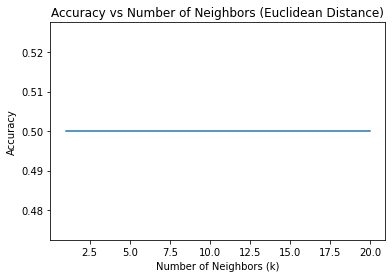

In [3]:
#Plot Accuracy vs Number of Neighbor
# Varying the number of neighbors from 1 to 20
neighbors_range = range(1, 21)
accuracies = []

for k in neighbors_range:
    model = NearestNeighbors(n_neighbors=k, metric='euclidean')
    model.fit(X_train)
    distances, indices = model.kneighbors(X_train)
    nearest_targets = y_train[indices]
    predicted_target = mode(nearest_targets, axis=None).mode[0]
    
    accuracies.append(np.mean(predicted_target == y_train))

# Plot the accuracy vs. number of neighbors
plt.plot(neighbors_range, accuracies)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Neighbors (Euclidean Distance)')
plt.show()


In [4]:
# Use Manhattan distance for k-nearest neighbors
model = NearestNeighbors(n_neighbors=k, metric='manhattan')
model.fit(X_train)
distances, indices = model.kneighbors(X_test)

# Print distances and targets
print("Distances to the 10 nearest neighbors (Manhattan):", distances)
nearest_targets = y_train[indices]
print("Target values of the nearest neighbors:", nearest_targets)


Distances to the 10 nearest neighbors (Manhattan): [[0.42664615 0.43631203 0.52693927 0.79625799 0.90137034 0.91486794
  0.9782299  1.02358678 1.02484724 1.05684106 1.13194678 1.25524984
  1.34984574 1.37279159 1.38898293 1.40238263 1.450842   1.51774491
  1.56117045 1.58097353]]
Target values of the nearest neighbors: [[1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1]]


In [5]:
#Creating Bootstrap Samples and Training Decision Trees
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Define sample size (20% of training data length)
sample_size = int(0.2 * len(X_train))

# Store each trained model
list_models = []

# Number of decision trees
no_classifiers = 10

# Train each model on a bootstrap sample
for _ in range(no_classifiers):
    # Create a bootstrap sample (sample with replacement)
    indices = np.random.choice(len(X_train), size=sample_size, replace=True)
    X_sample, y_sample = X_train[indices], y_train[indices]
    
    # Train a decision tree
    model = DecisionTreeClassifier()
    model.fit(X_sample, y_sample)
    
    # Store the model
    list_models.append(model)


In [6]:
# Majority voting for final predictions
final_predictions = np.zeros(len(X_test))

for model in list_models:
    final_predictions += model.predict(X_test)

# Majority vote
final_predictions = np.round(final_predictions / no_classifiers)

# Print final predictions
print("Final predictions:", final_predictions)


Final predictions: [2. 0. 0. 2. 1. 2. 2. 1. 0. 0. 1. 1. 0. 1. 2. 2. 0. 1. 0. 0. 2. 2. 1. 0.
 2. 0. 1. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 0. 2. 0. 0. 0. 2. 0.]


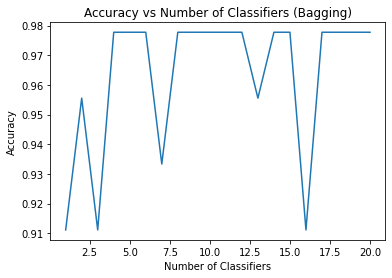

In [7]:
#Plot Accuracy vs Number of Classifiers
accuracies = []
classifiers_range = range(1, 21)

for num_classifiers in classifiers_range:
    list_models = []
    
    for _ in range(num_classifiers):
        indices = np.random.choice(len(X_train), size=sample_size, replace=True)
        X_sample, y_sample = X_train[indices], y_train[indices]
        model = DecisionTreeClassifier()
        model.fit(X_sample, y_sample)
        list_models.append(model)
    
    final_predictions = np.zeros(len(X_test))
    for model in list_models:
        final_predictions += model.predict(X_test)
    final_predictions = np.round(final_predictions / num_classifiers)
    
    accuracy = np.mean(final_predictions == y_test)
    accuracies.append(accuracy)

# Plot the accuracy vs number of classifiers
plt.plot(classifiers_range, accuracies)
plt.xlabel('Number of Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Classifiers (Bagging)')
plt.show()


In [27]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Example synthetic data
X_train = np.random.rand(100, 1)  # 100 data points, 1 feature
y_train = X_train ** 2 + np.random.normal(0, 0.1, (100, 1))  # Quadratic relationship with noise

# Initialize the first weak classifier (h_0 is the mean of y_train)
h_0 = np.mean(y_train)
H_0 = [h_0]  # Ensemble starts with the mean as the first weak learner

# Number of iterations (T)
T = 3  # For simplicity, using 3 iterations of boosting

for t in range(1, T):
    # Step 1: Compute the predictions of the ensemble at step t-1 (current ensemble prediction)
    # Create a (100, 1) array filled with the scalar H_0[-1] (mean value)
    y_pred_t_minus_1 = np.full((y_train.shape[0], 1), H_0[-1], dtype=np.float64)  # Creating (100, 1) array
    
    # Step 2: Compute residuals (difference between true values and predicted values)
    residuals = y_train - y_pred_t_minus_1
    
    # Step 3: Train a new weak classifier (a decision tree regressor) on the residuals
    tree = DecisionTreeRegressor(max_depth=3)  # Weak tree with a maximum depth of 3
    tree.fit(X_train, residuals)
    h_t = tree.predict(X_train)  # Predictions of the new weak learner
    
    # Reshape h_t to match the shape of residuals (100, 1)
    h_t = h_t.reshape(-1, 1)
    
    # Step 4: Add the new weak classifier to the ensemble
    H_0.append(h_t)
    
    # Step 5: Visualize the tree (optional, useful for debugging or analysis)
    print(f"Decision Tree for iteration {t}:")
    print(export_text(tree))
    
    # Step 6: Compute the new ensemble prediction by summing all weak learners
    y_pred_final = np.sum(H_0[1:], axis=0) + H_0[0]  # Summing all weak learners' predictions (excluding h_0)
    
    # Step 7: Show the final predictions (for this iteration)
    print(f"Ensemble prediction after {t} iterations (first 5 predictions): {y_pred_final[:5]}")


Decision Tree for iteration 1:
|--- feature_0 <= 0.67
|   |--- feature_0 <= 0.41
|   |   |--- feature_0 <= 0.24
|   |   |   |--- value: [-0.29]
|   |   |--- feature_0 >  0.24
|   |   |   |--- value: [-0.19]
|   |--- feature_0 >  0.41
|   |   |--- feature_0 <= 0.52
|   |   |   |--- value: [-0.08]
|   |   |--- feature_0 >  0.52
|   |   |   |--- value: [0.01]
|--- feature_0 >  0.67
|   |--- feature_0 <= 0.85
|   |   |--- feature_0 <= 0.73
|   |   |   |--- value: [0.21]
|   |   |--- feature_0 >  0.73
|   |   |   |--- value: [0.32]
|   |--- feature_0 >  0.85
|   |   |--- feature_0 <= 0.92
|   |   |   |--- value: [0.45]
|   |   |--- feature_0 >  0.92
|   |   |   |--- value: [0.57]

Ensemble prediction after 1 iterations (first 5 predictions): [[0.12297213]
 [0.76366738]
 [0.22710799]
 [0.88378928]
 [0.22710799]]
Decision Tree for iteration 2:
|--- feature_0 <= 0.98
|   |--- feature_0 <= 0.97
|   |   |--- feature_0 <= 0.08
|   |   |   |--- value: [0.35]
|   |   |--- feature_0 >  0.08
|   |   